# Predicting the value of states in a frozen lake environment
We learned that in the prediction method, the policy is given as an input and we predict
value function using the given policy. So let's initialize a random policy and predict the
value function (state values) of the frozen lake environment using the random policy.

First, let's import the necessary libraries:

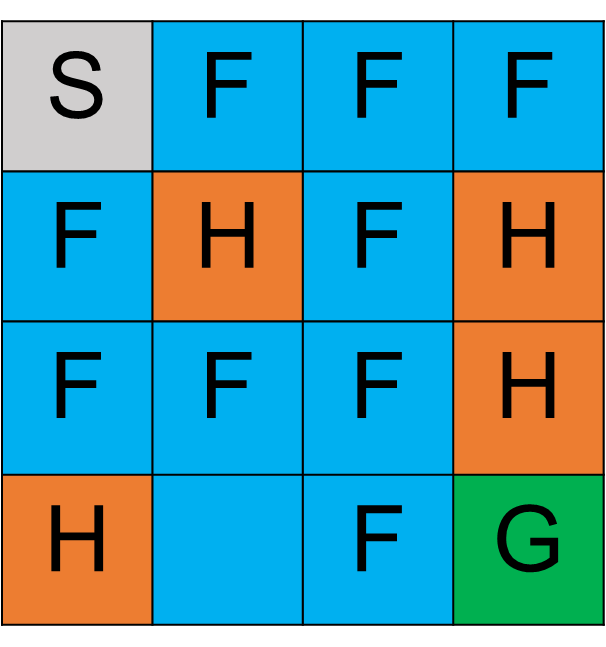

In [ ]:
import gym #pygym OpenAI
import pandas as pd

Now, we create the frozen lake environment using gym:

In [ ]:
env = gym.make('FrozenLake-v0')

Define the random policy which returns the random action by sampling from the action
space:

In [ ]:
def random_policy():
    return env.action_space.sample()

Let's define the dictionary for storing the value of states and we initialize the value of all the
states to 0.0:

In [ ]:
V = {}
for s in range(env.observation_space.n):
    V[s] = 0.0

Initialize the discount factor $\gamma$ and the learning rate $\alpha$: 

In [ ]:
alpha = 0.95 # learning rate
gamma = 0.90# faktor diskon

Define the number of episodes and number of time steps in the episode:

In [ ]:
num_episodes = 5000
num_timesteps = 1000

## Computing the value of states
Now, let's compute the value function (state values) using the given random policy as:

$$V(s) = V(s) + \alpha (r + \gamma V(s') - V(s)) $$

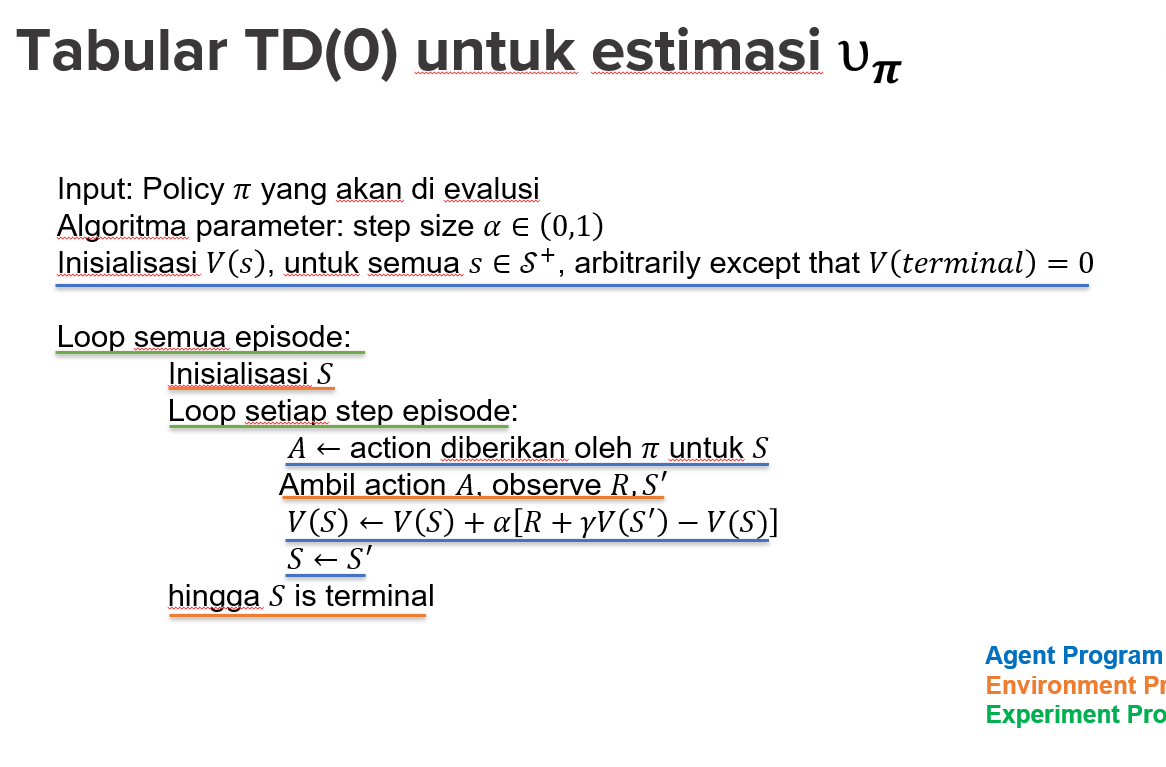

In [ ]:
#for each episode
for i in range(num_episodes):
    
    #initialize the state by resetting the environment
    s = env.reset()
    
    #for every step in the episode
    for t in range(num_timesteps):
        
        #select an action according to random policy
        a = random_policy()
        
        #perform the selected action and store the next state information
        s_, r, done, _ = env.step(a)
        
        #compute the value of the state
        V[s] += alpha * (r + gamma * V[s_]-V[s])
        
        #update next state to the current state
        s = s_
        
        #if the current state is the terminal state then break
        if done:
            break

After all the iterations, we will have a value of all the states according to the given random
policy. 

## Evaluating the value of states 

Now, let's evaluate our value function (state values). First, let's convert our value dictionary
to a pandas data frame for more clarity:

In [ ]:
df = pd.DataFrame(list(V.items()), columns=['state', 'value'])

Before checking the value of the states, let's recollect that in the gym all the states in the
frozen lake environment will be encoded into numbers. Since we have 16 states, all the
states will be encoded into numbers from 0 to 15 as shown below:

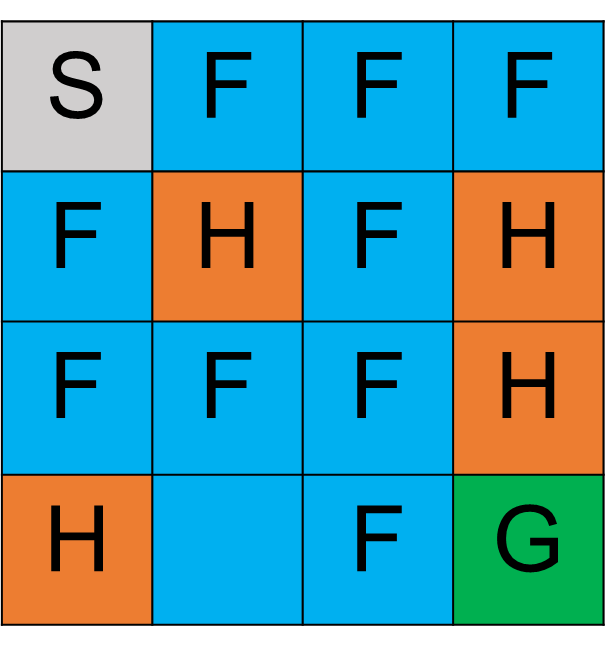

Now, Let's check the value of the states:

In [ ]:
df

,state,value
0,0,6.206420e-05
1,1,1.170495e-05
2,2,3.053482e-05
3,3,8.310795e-07
4,4,1.850548e-06
5,5,0.000000e+00
6,6,1.135728e-04
7,7,0.000000e+00
8,8,2.482805e-01
9,9,1.873529e-02


As we can observe, now we have the value of all the states and also we can notice that
the value of all the terminal states (hole states and goal state) is zero.

Now that we have understood how TD learning can be used for the prediction task, in the
next section, we will learn how to use TD learning for the control task. 